# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import adf
from lib import stats
from lib.plots.data import (DataPlotType, stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = numpy.array([0.5])
d = 1
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)

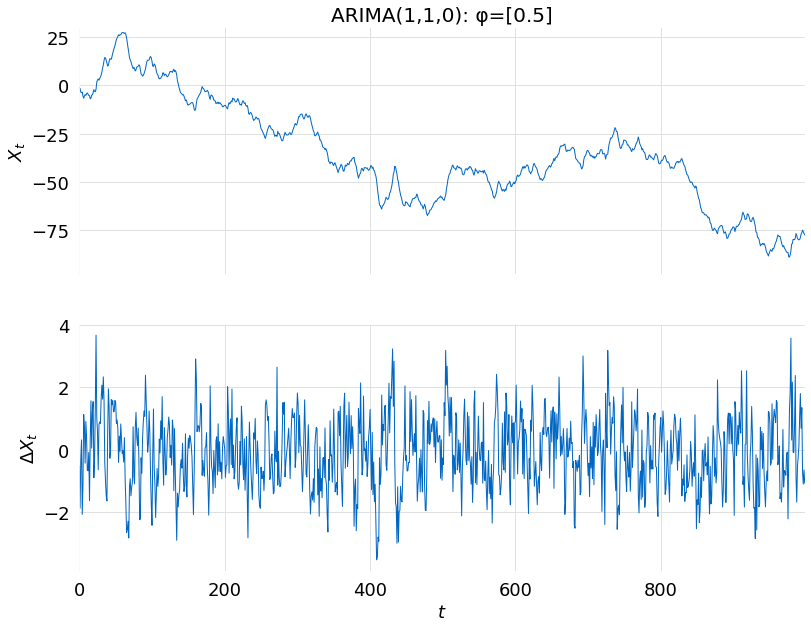

In [4]:
title = f"ARIMA(1,1,0): φ={φ}"
stack([samples[:-1], diff_1], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1])

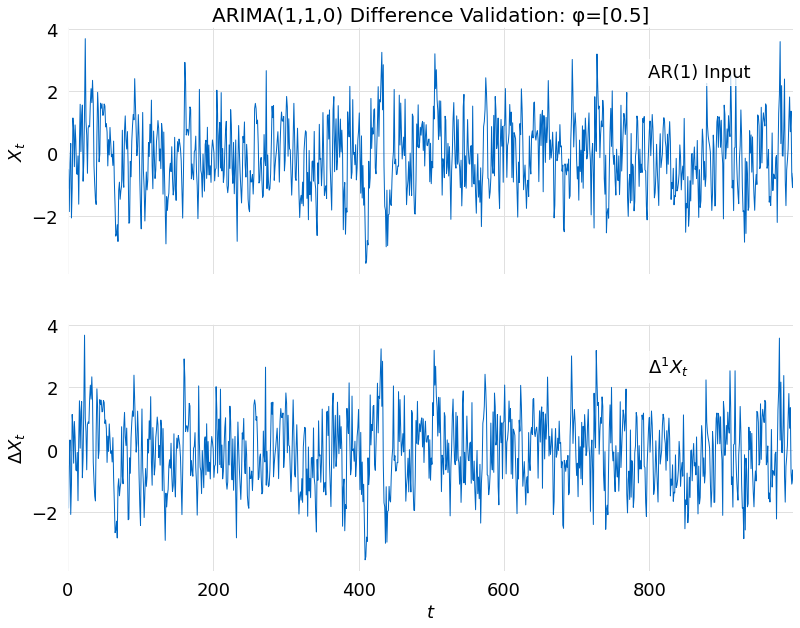

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar[:-1], diff_1], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(1) Input", r"$\Delta^1 X_t$"])

In [6]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │   0.349756 │
├────────────────┼────────────┤
│ pvalue         │   0.788079 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [7]:
arima.adf_test(diff_1, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -15.1318      │
├────────────────┼───────────────┤
│ pvalue         │   8.25331e-27 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 997           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

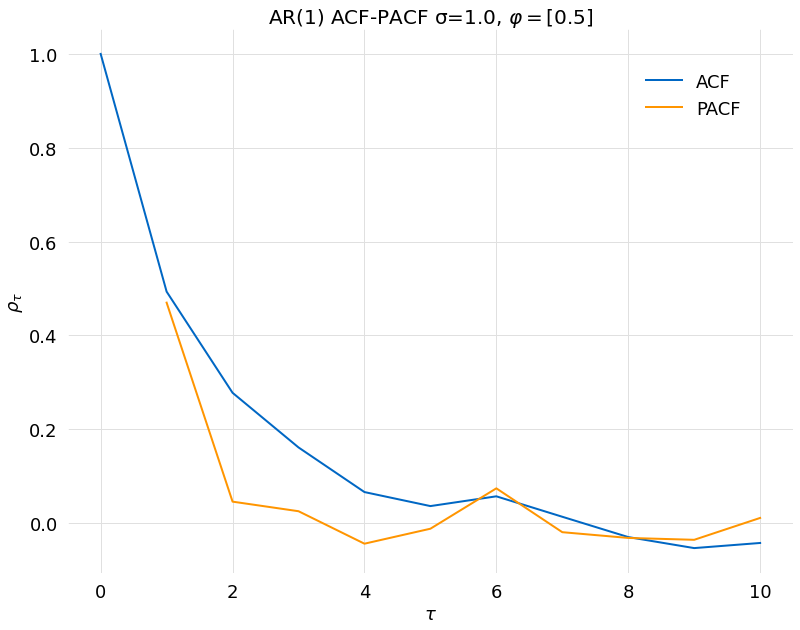

In [8]:
acf = stats.acf(diff_1, nlags)
pacf = arima.yw(diff_1, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [9]:
result = arima.ar_fit(diff_1, 1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1417.303
Date:                Fri, 15 Apr 2022   AIC                           2840.607
Time:                        08:48:18   BIC                           2855.327
Sample:                             0   HQIC                          2846.202
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0791      0.063     -1.257      0.209      -0.202       0.044
ar.L1          0.4933      0.027     18.347      0.000       0.441       0.546
sigma2         0.9993      0.048     20.852      0.000       0.905       1.093
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 6.58
Prob(Q):                              0.48   Prob(JB):                         0.04
Heteroskedasticity (H):               1.12   Skew:                             0.16
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [10]:
φ = numpy.array([0.75])
d = 2
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)
diff_2 = arima.diff(diff_1)

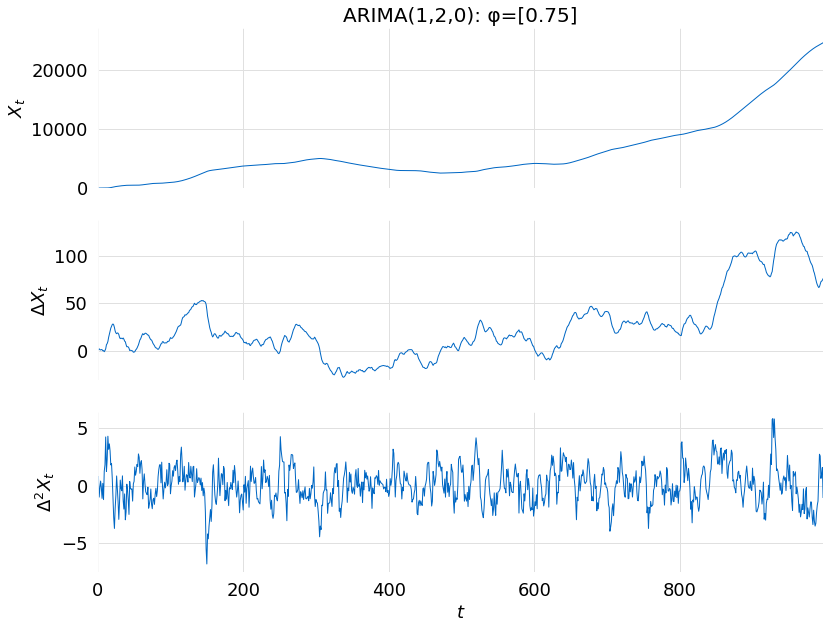

In [11]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([samples[:-2], diff_1[:-1], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1, DataPlotType.DIFF_2])

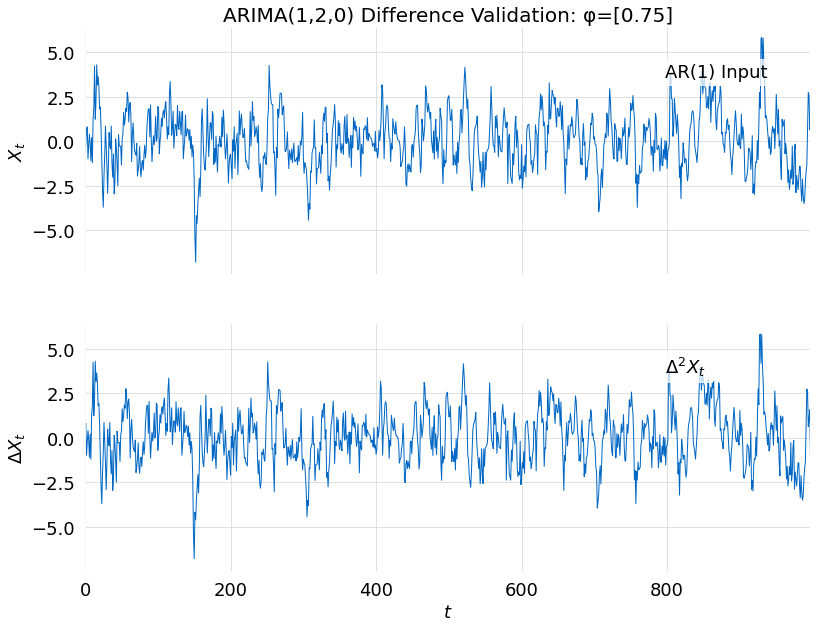

In [12]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar[:-2], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(1) Input", r"$\Delta^2 X_t$"])

In [13]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │   1.76749  │
├────────────────┼────────────┤
│ pvalue         │   0.982014 │
├────────────────┼────────────┤
│ Lags           │   5        │
├────────────────┼────────────┤
│ Number Obs     │ 994        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [14]:
arima.adf_test(diff_1, True)

╒════════════════╤════════════╕
│ Test Statistic │  -1.04695  │
├────────────────┼────────────┤
│ pvalue         │   0.265691 │
├────────────────┼────────────┤
│ Lags           │   4        │
├────────────────┼────────────┤
│ Number Obs     │ 994        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [15]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -10.2068      │
├────────────────┼───────────────┤
│ pvalue         │   3.52253e-18 │
├────────────────┼───────────────┤
│ Lags           │   3           │
├────────────────┼───────────────┤
│ Number Obs     │ 994           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

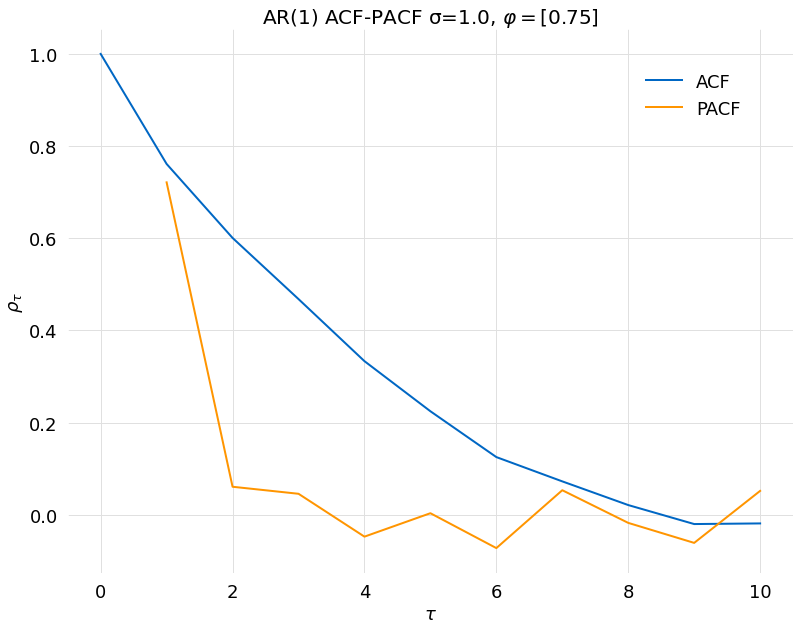

In [16]:
acf = stats.acf(diff_2, nlags)
pacf = arima.yw(diff_2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [17]:
result = arima.ar_fit(diff_2, 1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1427.064
Date:                Fri, 15 Apr 2022   AIC                           2860.128
Time:                        08:48:19   BIC                           2874.845
Sample:                             0   HQIC                          2865.722
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0728      0.134      0.544      0.586      -0.189       0.335
ar.L1          0.7610      0.020     37.488      0.000       0.721       0.801
sigma2         1.0213      0.041     24.962      0.000       0.941       1.102
===================================================================================
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                11.74
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.03
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [18]:
φ = numpy.array([0.25, 0.4])
d = 2
ar = arima.arp(φ, nsample)
samples = arima.arima_from_arma(ar, d)
diff_1 = arima.diff(samples)
diff_2 = arima.diff(diff_1)

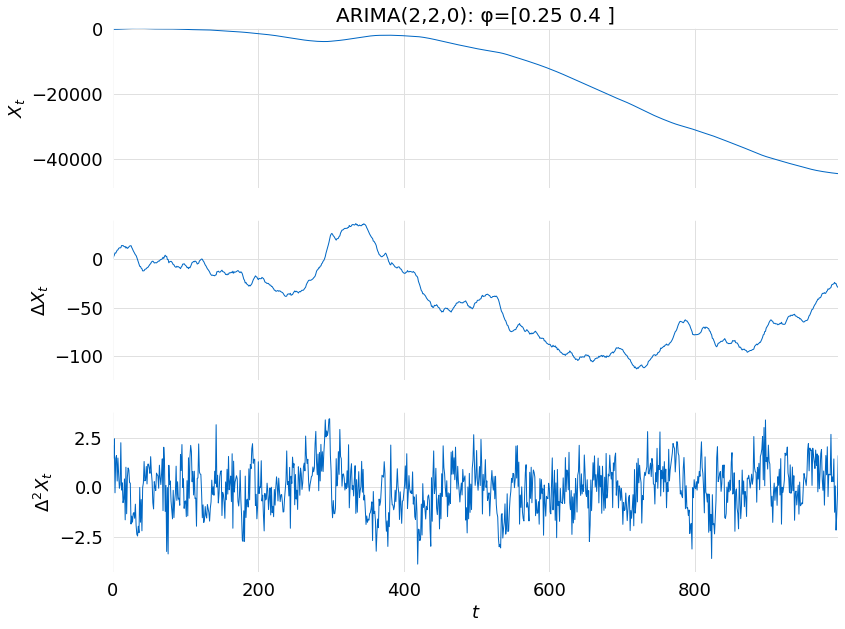

In [19]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([samples[:-2], diff_1[:-1], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1, DataPlotType.DIFF_2])

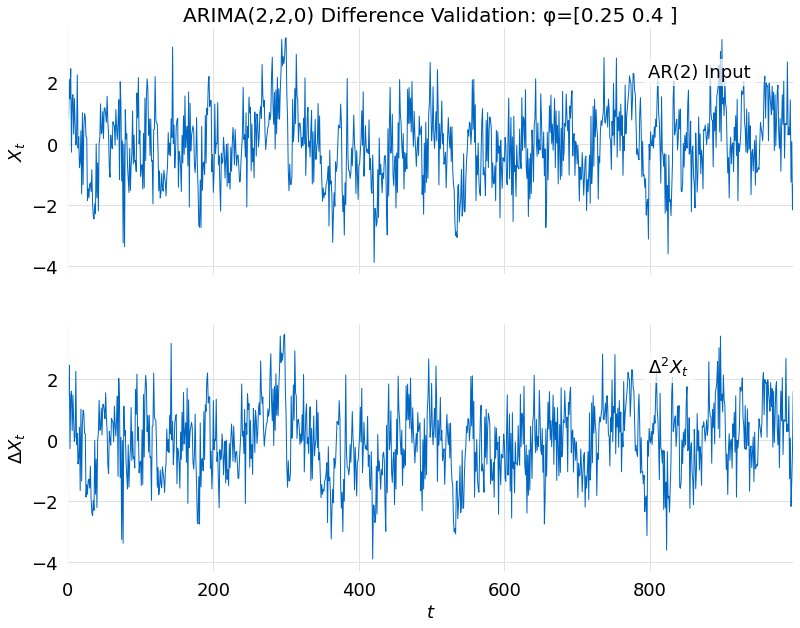

In [20]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar[:-2], diff_2], title=title, plot_type=[DataPlotType.TIME_SERIES, DataPlotType.DIFF_1], labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [21]:
arima.adf_test(samples, True)

╒════════════════╤════════════╕
│ Test Statistic │  -1.06885  │
├────────────────┼────────────┤
│ pvalue         │   0.257361 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [22]:
arima.adf_test(diff_1, True)

╒════════════════╤════════════╕
│ Test Statistic │  -0.772482 │
├────────────────┼────────────┤
│ pvalue         │   0.382082 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


True

In [23]:
arima.adf_test(diff_2, True)

╒════════════════╤═══════════════╕
│ Test Statistic │ -10.5355      │
├────────────────┼───────────────┤
│ pvalue         │   6.87264e-19 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 996           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


False

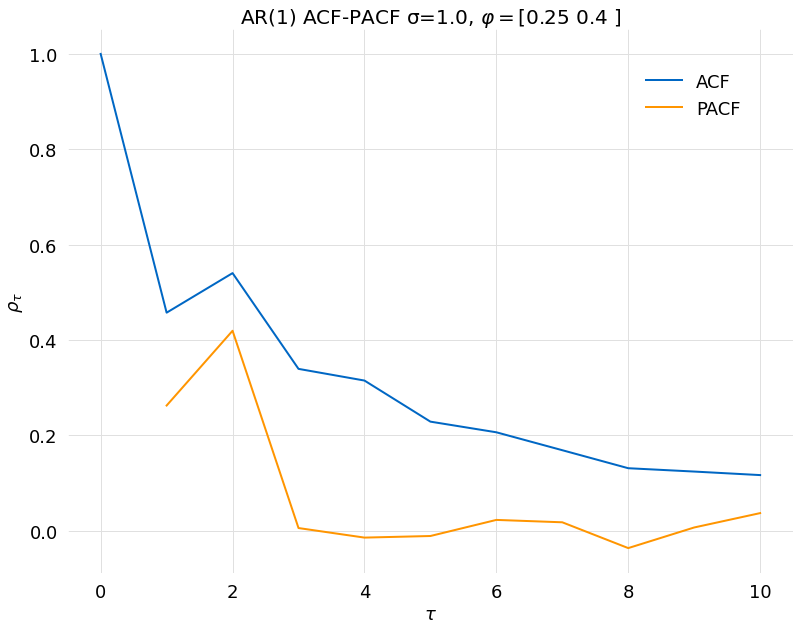

In [24]:
acf = stats.acf(diff_2, nlags)
pacf = arima.yw(diff_2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
y = [acf, pacf]
x = [range(nlags+1), range(1, nlags+1)]
comparison(y, x=x, title=title, labels=["ACF", "PACF"], plot_type=DataPlotType.ACF)

In [25]:
result = arima.ar_fit(diff_2, 2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1392.344
Date:                Fri, 15 Apr 2022   AIC                           2792.688
Time:                        08:48:21   BIC                           2812.311
Sample:                             0   HQIC                          2800.147
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0180      0.098     -0.183      0.855      -0.210       0.174
ar.L1          0.2663      0.029      9.202      0.000       0.210       0.323
ar.L2          0.4207      0.029     14.374      0.000       0.363       0.478
sigma2         0.9529      0.045     21.396      0.000       0.866       1.040
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.88   Prob(JB):                         0.56
Heteroskedasticity (H):               0.96   Skew:                             0.02
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""